In [1]:
# Data pre-processing
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import openpyxl
import pandas as pd
import numpy as np 
import missingno as msno
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

#K-Nearest Neighbor Classification
import sklearn
from sklearn import neighbors
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#Reading Excel file that has the football players statistics. Creating a new text file and appending the 
#excel data into a text file. 

In [2]:

with open('football.txt', 'w', encoding='utf-8', errors='ignore') as file:
    pd.read_excel('2021-06-23_Dataset_Fifa_19.xlsx').to_string(file, index=False)

In [3]:
#Reading a text file and storing it into a dataframe.
football= pd.read_csv('football.txt')
football.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes  \
0      6.0        11.0       15.0           14.0        8.0   
1      7.0        11.0       15.0           14.0       11.0   
2      9.0         9.0       15.0           15.0       11.0   
3     90.0        85.0       87.0           88.0       94.0   
4     15.0        13.0        5.0           10.0       13.0   

  Release Clause                                                                                                                                                                                                                                                                                                                                                                                                   Unnamed: 1  
0  €226.5M                                       ...                                                                                                                                                                                                                                                                                                                                                                           
1  €127.1M                                       ...                                                                                                                                                                                                                                                                                                                                                                           
2  €228.1M                                       ...                                                                                                                                                                                                                                                                                                                                                                           
3  €138.6M                                       ...                                                                                                                                                                                                                                                                                                                                                                           
4  €196.4M

Dataframe Dimensions

In [4]:
football.shape

(18207, 89)

In [5]:
football.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

checking for missing values

In [6]:
football.isnull().values.sum()

75421

As we see column named 'Unnamed: 0' is index number, we can remove it

In [7]:
football=football.drop(columns=['Unnamed: 0'])
football.head

<bound method NDFrame.head of            ID                Name  Age  \
0      158023            L. Messi   31   
1       20801   Cristiano Ronaldo   33   
2      190871           Neymar Jr   26   
3      193080              De Gea   27   
4      192985        K. De Bruyne   27   
...       ...                 ...  ...   
18202  238813        J. Lundstram   19   
18203  243165  N. Christoffersson   19   
18204  241638           B. Worman   16   
18205  246268      D. Walker-Rice   17   
18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               .

Corelation between properties we have

In [8]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

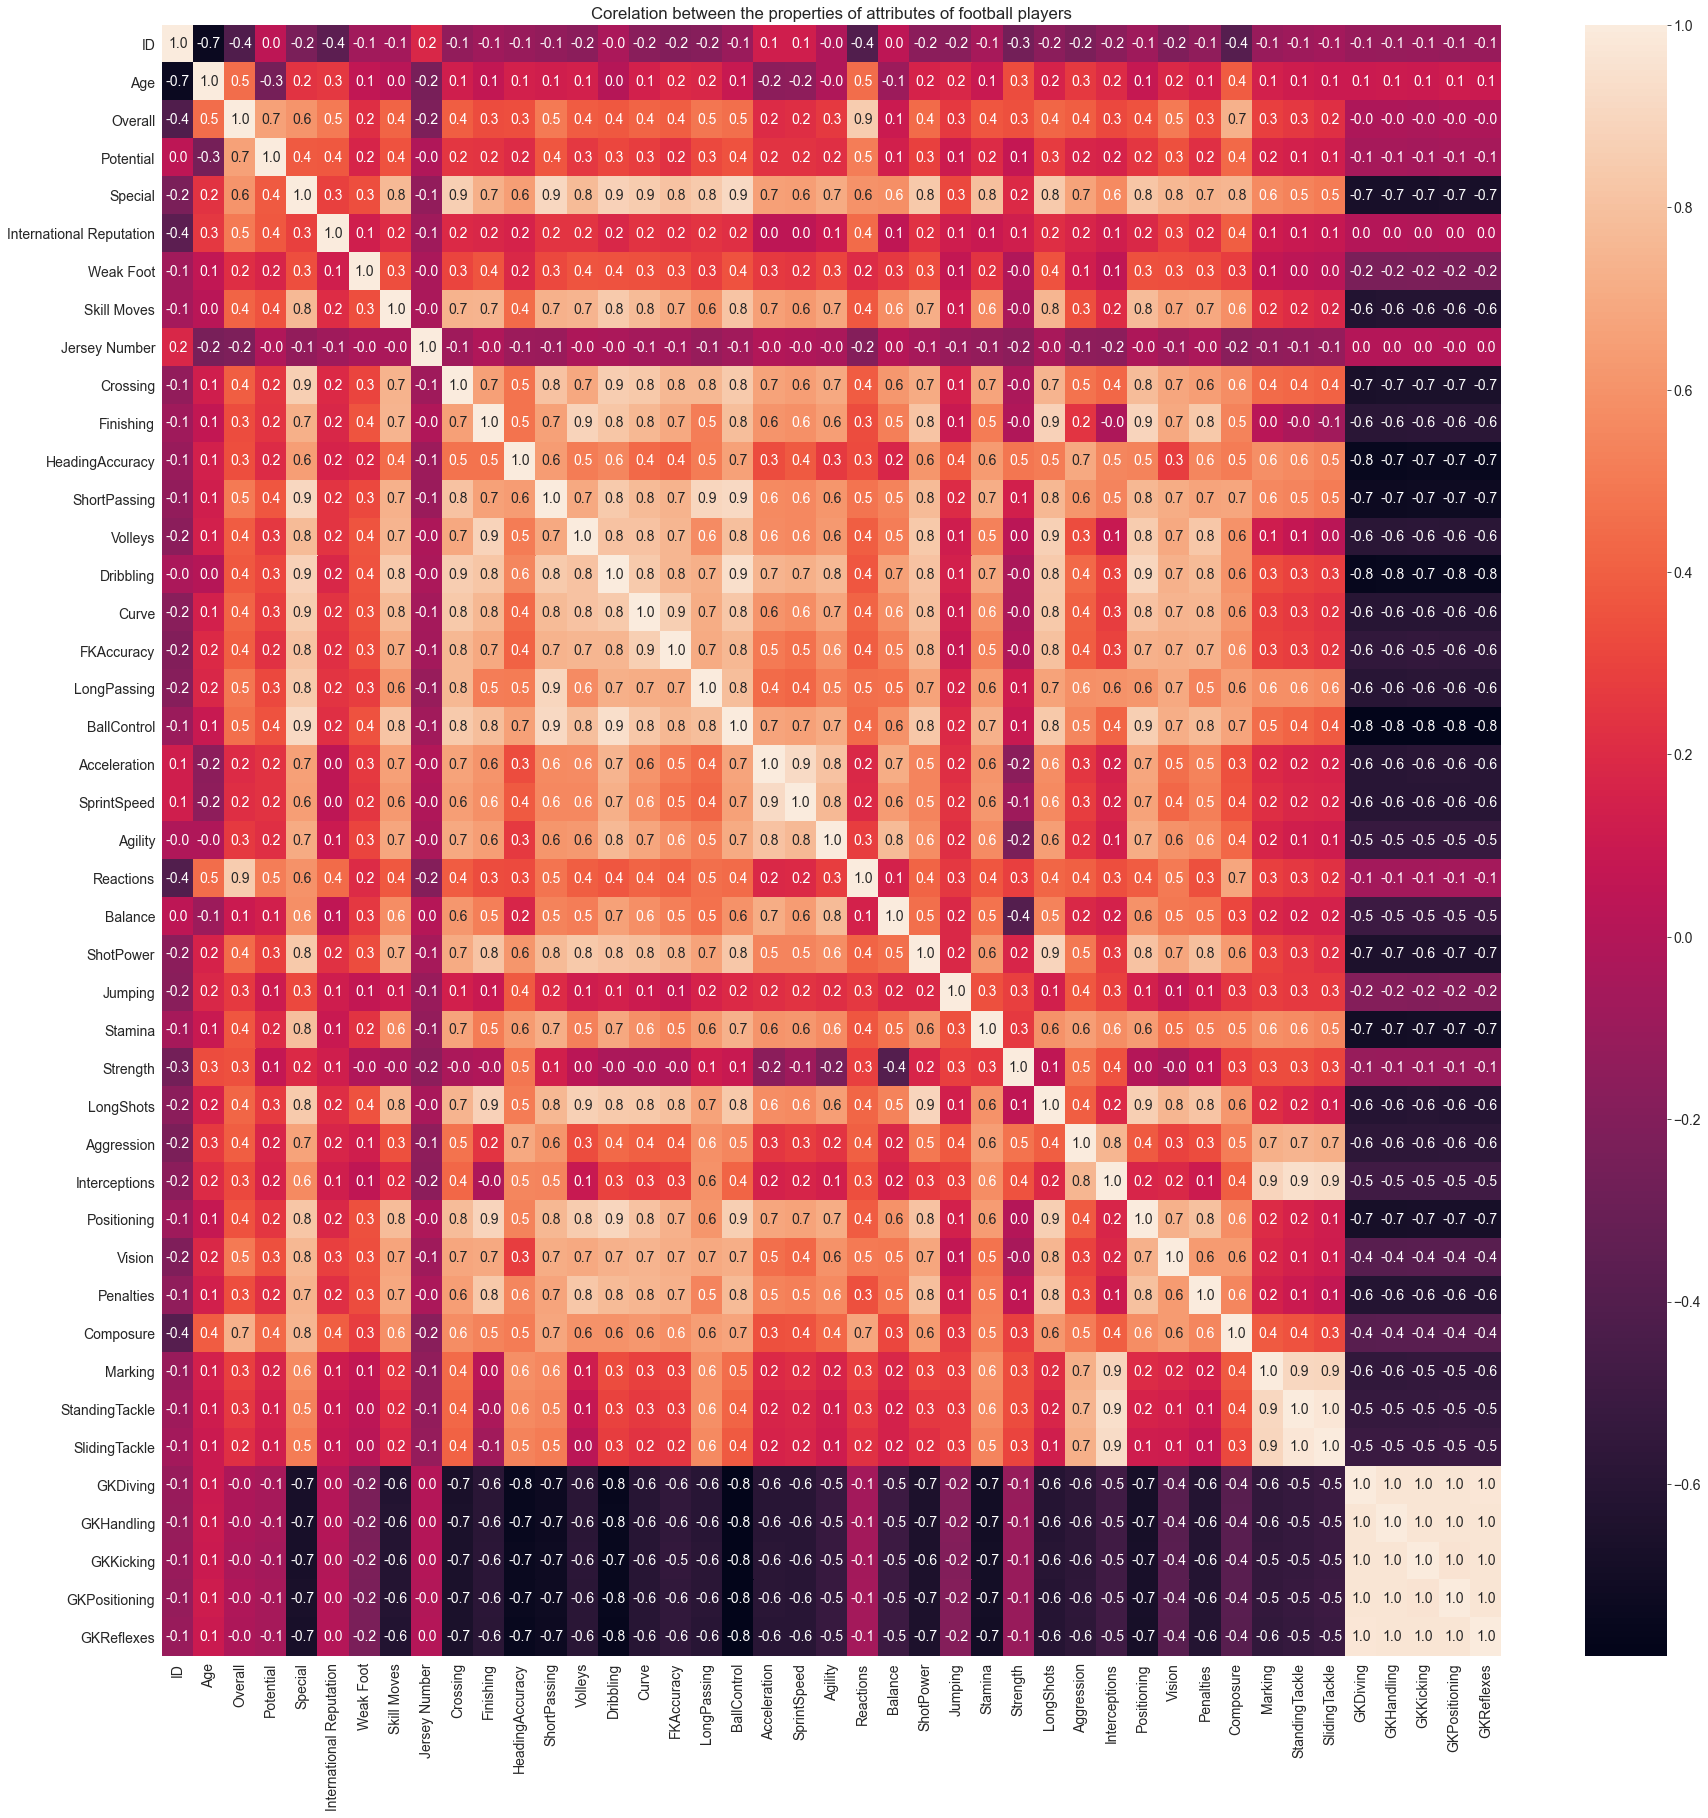

In [9]:
plt.figure(figsize = (30,30))
sns.heatmap(football.corr(), annot = True, fmt = '.1f')
plt.title("Corelation between the properties of attributes of football players")
plt.show()

based on correlation above we can say that goal keeper is having more variations when,
compared to other players(non-goalkeepers)

top 5 countries in FIFA-19

In [10]:
per_nation = football["Nationality"].value_counts()
per_nation = per_nation.reset_index()
per_nation.columns= ["Nations","Counts"]
per_nation.head()

Nations  Counts
0    England    1662
1    Germany    1198
2      Spain    1072
3  Argentina     937
4     France     914

In [11]:
fig = px.bar(per_nation, y='Counts', x='Nations', text='Nations')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

Selecting only the relevant features required to analyze the data according to the Usecases.

In [12]:

Football = football[['ID','Name','Age','Overall','Club','Value','Preferred Foot','Weak Foot','Position','Height','Weight','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing',
                     'BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots',
                     'Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']]

In [13]:
Football.head()

ID               Name  Age  Overall                 Club    Value  \
0  158023           L. Messi   31       94         FC Barcelona  €110.5M   
1   20801  Cristiano Ronaldo   33       94             Juventus     €77M   
2  190871          Neymar Jr   26       92  Paris Saint-Germain  €118.5M   
3  193080             De Gea   27       91    Manchester United     €72M   
4  192985       K. De Bruyne   27       91      Manchester City    €102M   

  Preferred Foot  Weak Foot Position Height  ... Penalties  Composure  \
0           Left        4.0       RF    5'7  ...      75.0       96.0   
1          Right        4.0       ST    6'2  ...      85.0       95.0   
2          Right        5.0       LW    5'9  ...      81.0       94.0   
3          Right        3.0       GK    6'4  ...      40.0       68.0   
4          Right        5.0      RCM   5'11  ...      79.0       88.0   

   Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
0     33.0            28.0           26.0       6.0        11.0       15.0   
1     28.0            31.0           23.0       7.0        11.0       15.0   
2     27.0            24.0           33.0       9.0         9.0       15.0   
3     15.0            21.0           13.0      90.0        85.0       87.0   
4     68.0            58.0           51.0      15.0        13.0        5.0   

   GKPositioning  GKReflexes  
0           14.0         8.0  
1           14.0        11.0  
2           15.0        11.0  
3           88.0        94.0  
4           10.0        13.0  

[5 rows x 45 columns]

# UseCase1:Which club is likely to concede the fewest goals during a season?

In [14]:
Football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               18207 non-null  int64  
 1   Name             18207 non-null  object 
 2   Age              18207 non-null  int64  
 3   Overall          18207 non-null  int64  
 4   Club             17966 non-null  object 
 5   Value            18207 non-null  object 
 6   Preferred Foot   18159 non-null  object 
 7   Weak Foot        18159 non-null  float64
 8   Position         18147 non-null  object 
 9   Height           18159 non-null  object 
 10  Weight           18159 non-null  object 
 11  Crossing         18159 non-null  float64
 12  Finishing        18159 non-null  float64
 13  HeadingAccuracy  18159 non-null  float64
 14  ShortPassing     18159 non-null  float64
 15  Volleys          18159 non-null  float64
 16  Dribbling        18159 non-null  float64
 17  Curve       

Data Preprocessing - There are many null values in more than 20 columns and we chose to remove those records which are null because those columns cannot be filled by any techniques like mean,mode and median as the players skills score differes accordingly.

Removing the players who does not belongs to any clubs.

In [15]:
#Removing the rows which are null for more than 20 columns.
Football1 = Football[Football.isnull().sum(axis=1) < 20]

In [16]:
#Removing the players who does not have any clubs.
Footbal= Football1.dropna(axis=0, subset=['Club'])

In [17]:
Footbal.head()

ID               Name  Age  Overall                 Club    Value  \
0  158023           L. Messi   31       94         FC Barcelona  €110.5M   
1   20801  Cristiano Ronaldo   33       94             Juventus     €77M   
2  190871          Neymar Jr   26       92  Paris Saint-Germain  €118.5M   
3  193080             De Gea   27       91    Manchester United     €72M   
4  192985       K. De Bruyne   27       91      Manchester City    €102M   

  Preferred Foot  Weak Foot Position Height  ... Penalties  Composure  \
0           Left        4.0       RF    5'7  ...      75.0       96.0   
1          Right        4.0       ST    6'2  ...      85.0       95.0   
2          Right        5.0       LW    5'9  ...      81.0       94.0   
3          Right        3.0       GK    6'4  ...      40.0       68.0   
4          Right        5.0      RCM   5'11  ...      79.0       88.0   

   Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
0     33.0            28.0           26.0       6.0        11.0       15.0   
1     28.0            31.0           23.0       7.0        11.0       15.0   
2     27.0            24.0           33.0       9.0         9.0       15.0   
3     15.0            21.0           13.0      90.0        85.0       87.0   
4     68.0            58.0           51.0      15.0        13.0        5.0   

   GKPositioning  GKReflexes  
0           14.0         8.0  
1           14.0        11.0  
2           15.0        11.0  
3           88.0        94.0  
4           10.0        13.0  

[5 rows x 45 columns]

To solve the Use Case 1 we chose to sort the players according to the Defense Position and Defense Skill Scores. Then to sum up the clubs whi has high number of points in defense.

In [18]:
Clubs = Footbal[['Name','Overall','Club','Position']]

#Creating the array of sum of all defensive skill scores and adding as a new column to a dataframe.

In [19]:

DefensiveSkills = Footbal['HeadingAccuracy'] + Footbal['ShortPassing'] + Footbal['LongPassing'] + Footbal['Volleys'] + Footbal['BallControl']
+ Footbal['Marking'] + Footbal['StandingTackle'] + Footbal['SlidingTackle']
Clubs['DefensiveSkills'] = DefensiveSkills

Similarly, adding all skill scores related to physical and mental in order to get the strongest 
clubs who has a good physical ability to play at defensive positions.


In [20]:
PhysicalnMental = Footbal['Acceleration'] + Footbal['SprintSpeed'] + Footbal['Agility'] + Footbal['Reactions'] + Footbal['Balance'] + Footbal['ShotPower'] + Footbal['Jumping'] + Footbal['Stamina'] + Footbal['Strength'] + Footbal['LongShots'] + Footbal['Aggression'] + Footbal['Interceptions'] + Footbal['Positioning'] + Footbal['Vision'] + Footbal['Penalties'] + Footbal['Composure']
Clubs['FitnessScore'] = PhysicalnMental

Adding Goal Keeper skill scores to a new array and assigning it to a dataframe column as these are required for the 
analysis of a good defense because goal keepers play decent role in defenfing scoring goals by opponents

In [21]:

GoalKeeper = Footbal['GKDiving'] + Footbal['GKHandling'] + Footbal['GKKicking'] + Footbal['GKPositioning'] + Footbal['GKReflexes']
Clubs['GoalKeeperSkills'] = GoalKeeper

In [22]:
Clubs 

Name  Overall                 Club Position  \
0                L. Messi       94         FC Barcelona       RF   
1       Cristiano Ronaldo       94             Juventus       ST   
2               Neymar Jr       92  Paris Saint-Germain       LW   
3                  De Gea       91    Manchester United       GK   
4            K. De Bruyne       91      Manchester City      RCM   
...                   ...      ...                  ...      ...   
18202        J. Lundstram       47      Crewe Alexandra       CM   
18203  N. Christoffersson       47       Trelleborgs FF       ST   
18204           B. Worman       47     Cambridge United       ST   
18205      D. Walker-Rice       47      Tranmere Rovers       RW   
18206           G. Nugent       46      Tranmere Rovers       CM   

       DefensiveSkills  FitnessScore  GoalKeeperSkills  
0                429.0        1265.0              54.0  
1                428.0        1332.0              58.0  
2                403.0        1254.0              59.0  
3                177.0         781.0             444.0  
4                411.0        1296.0              56.0  
...                ...           ...               ...  
18202            202.0         790.0              47.0  
18203            196.0         677.0              45.0  
18204            194.0         765.0              40.0  
18205            205.0         735.0              51.0  
18206            219.0         782.0              55.0  

[17918 rows x 7 columns]

Selecting the players who plays at defensive positions and storing it to new dataframe as
we mainly concentate on the players who play at these positions.

In [23]:

Club1 = Clubs[Clubs['Position'].isin(['GK','SW','FB','LWB','RWB','WB','LDM','RDM','CDM','LB','LCB','CB','RB','RCB','DM'])]

In [24]:
Club1

Name  Overall               Club Position  DefensiveSkills  \
3            De Gea       91  Manchester United       GK            177.0   
8      Sergio Ramos       91        Real Madrid      RCB            396.0   
9          J. Oblak       90    Atlético Madrid       GK             99.0   
12         D. Godín       90    Atlético Madrid       CB            364.0   
14         N. Kanté       89            Chelsea      LDM            357.0   
...             ...      ...                ...      ...              ...   
18192     S. Squire       47   Cambridge United      CDM            211.0   
18193    N. Fuentes       47     Unión Española       RB            146.0   
18194      J. Milli       47              Lecce       GK             78.0   
18198    J. Livesey       47      Burton Albion       GK             73.0   
18201      D. Walsh       47       Waterford FC       RB            156.0   

       FitnessScore  GoalKeeperSkills  
3             781.0             444.0  
8            1236.0              46.0  
9             749.0             433.0  
12           1097.0              49.0  
14           1287.0              54.0  
...             ...               ...  
18192         789.0              55.0  
18193         732.0              45.0  
18194         358.0             240.0  
18198         413.0             246.0  
18201         675.0              52.0  

[9194 rows x 7 columns]

In [25]:
c1 = Club1.sort_values(by='Overall', ascending=False).head(10)

Plotting a line graph of the top 10 players who has good overall score.

In [26]:

fig = go.Figure(data=[
    go.Scatter(name='Overall Rating', x=c1['Name'], y=c1['Overall'],hovertext=c1['Club']),
    
])
fig.show()

In [27]:

c2=Club1.sort_values(by='DefensiveSkills', ascending=False).head(10)

Plotting a line graph of the top 10 players who has good Defensive skills score.

In [28]:

fig = go.Figure(data=[
    go.Scatter(name='Defensive Skills Rating', x=c2['Name'], y=c2['DefensiveSkills'],hovertext=c2['Club'])
    
])
fig.show()

In [29]:
c3=Club1.sort_values(by='GoalKeeperSkills', ascending=False).head(10)

Plotting a line graph of the top 10 players who has good Goalkeeping skills score.

In [30]:

fig = go.Figure(data=[
    go.Scatter(name='Goal Keeper Skills Rating', x=c3['Name'], y=c3['GoalKeeperSkills'],hovertext=c3['Club'])
])
fig.show()

Grouping by clubs to know the total scores of overall score, defensive skills score,fitness scores and goalkeeping skills score

In [31]:

Club2 = Club1.groupby(['Club'])['Overall','DefensiveSkills','FitnessScore','GoalKeeperSkills'].sum().reset_index()

In [32]:
Club2

Club  Overall  DefensiveSkills  FitnessScore  \
0      SSV Jahn Regensburg     1115           4051.0       14315.0   
1    1. FC Heidenheim 1846      984           3401.0       12803.0   
2     1. FC Kaiserslautern     1065           3969.0       14405.0   
3               1. FC Köln     1049           3604.0       13041.0   
4          1. FC Magdeburg      868           2928.0       10801.0   
..                     ...      ...              ...           ...   
655     Zagłębie Sosnowiec      904           3299.0       12326.0   
656        Çaykur Rizespor     1385           5388.0       18906.0   
657              Örebro SK      784           2589.0       10121.0   
658          Östersunds FK      564           1920.0        7447.0   
659          Śląsk Wrocław      944           3614.0       13104.0   

     GoalKeeperSkills  
0              1637.0  
1              1606.0  
2              1539.0  
3              1877.0  
4              1464.0  
..                ...  
655            1543.0  
656            2170.0  
657            1353.0  
658            1183.0  
659            1515.0  

[660 rows x 5 columns]

Summing up defensive skill scores and goalkeeping skills score to get the total defensive points that clubs have.

In [33]:

Club2['OverallDefenseScore'] = Club2['DefensiveSkills'] + Club2['GoalKeeperSkills']

In [34]:
#Sorting the top 10 clubs that have good overall defense scores to analyze the clubs which prevents opponents scoring a goal.
Club3 = Club2.sort_values('OverallDefenseScore', ascending=False).head(10)
Club3

Club  Overall  DefensiveSkills  FitnessScore  \
367          Leicester City     1473           5670.0       19256.0   
383         Manchester City     1432           5533.0       18805.0   
206                 Everton     1435           5592.0       18782.0   
593  Toulouse Football Club     1388           5343.0       18355.0   
52                  Arsenal     1495           5566.0       19362.0   
656         Çaykur Rizespor     1385           5388.0       18906.0   
428  Olympique de Marseille     1396           5158.0       18083.0   
212            FC Barcelona     1373           5039.0       17278.0   
17                AS Monaco     1376           4975.0       17637.0   
479             Real Madrid     1401           4905.0       17486.0   

     GoalKeeperSkills  OverallDefenseScore  
367            2083.0               7753.0  
383            2157.0               7690.0  
206            2044.0               7636.0  
593            2254.0               7597.0  
52             1997.0               7563.0  
656            2170.0               7558.0  
428            2098.0               7256.0  
212            2215.0               7254.0  
17             2224.0               7199.0  
479            2282.0               7187.0

Create figure - Bar plot of top 10 clubs who has good Defensive skills, fitness score and goal keeping scores,From the below plot we can conclude that the Leicester City Football club could conceed less goals.As the club leicester city has pretty good overall, goalkeeping, fitness and defense scores.


In [35]:
fig = go.Figure(data=[
    go.Bar(name='Overall Skills Rating', x=Club3['Club'], y=Club3['Overall'],hovertext=Club3['FitnessScore']),
    go.Bar(name='Defensive Score Skills Rating', x=Club3['Club'], y=Club3['DefensiveSkills'],hovertext=Club3['FitnessScore']),
    go.Bar(name='Goal Keeper Skills Rating', x=Club3['Club'], y=Club3['GoalKeeperSkills'],hovertext=Club3['FitnessScore'])
])

# Set templates
fig.update_layout(template="ggplot2")

fig.show()

In [36]:
Club11 = Club1.loc[Club1['Club'] == 'Manchester City']
Club11

Name  Overall             Club Position  DefensiveSkills  \
57                Ederson       86  Manchester City       GK            183.0   
75            Fernandinho       86  Manchester City      CDM            385.0   
89            N. Otamendi       85  Manchester City       CB            359.0   
107            V. Kompany       85  Manchester City       CB            339.0   
113            A. Laporte       84  Manchester City      LCB            352.0   
135             K. Walker       84  Manchester City       RB            354.0   
182             J. Stones       83  Manchester City      RCB            345.0   
352              B. Mendy       81  Manchester City       LB            324.0   
514              F. Delph       80  Manchester City       LB            359.0   
645                Danilo       79  Manchester City       RB            366.0   
871              C. Bravo       78  Manchester City       GK            180.0   
1304           E. Mangala       76  Manchester City       CB            285.0   
4652         O. Zinchenko       71  Manchester City       LB            348.0   
6316           P. Sandler       69  Manchester City       CB            303.0   
8966             C. Gomes       66  Manchester City      CDM            293.0   
13211         Eric García       62  Manchester City       CB            262.0   
13814  C. Humphreys-Grant       62  Manchester City       CB            242.0   
14511            A. Muric       61  Manchester City       GK            117.0   
17451         D. Grimshaw       54  Manchester City       GK            137.0   

       FitnessScore  GoalKeeperSkills  
57            782.0             425.0  
75           1223.0              48.0  
89           1091.0              48.0  
107          1064.0              38.0  
113          1042.0              45.0  
135          1236.0              57.0  
182          1054.0              51.0  
352          1194.0              47.0  
514          1227.0              50.0  
645          1185.0              53.0  
871           775.0             393.0  
1304         1014.0              53.0  
4652         1109.0              61.0  
6316          974.0              64.0  
8966         1007.0              46.0  
13211         835.0              50.0  
13814         887.0              55.0  
14511         575.0             303.0  
17451         531.0             270.0

Plotting line graph of Manchester city club players overall and defensive skill scores to analyze 
how good the players are in those areas. 
From the plot we can say that Manchester City has almost 50% of the players who has good defensive skills 
and overall scores for example Fernandhino has over all score as 86 and defensive skills score as 385.

In [37]:

fig = go.Figure()

# Add trace
fig.add_trace(
    go.Scatter(x=Club11['Overall'], y=Club11['DefensiveSkills'],hovertext=Club11['Name'],line_color='red')
)

# Add images
fig.add_layout_image(
        dict(
            source="undefined.jpg",
            xref="x",
            yref="y",
            x=52,
            y=500,
            sizex=40,
            sizey=400,
          sizing="stretch",
            opacity=0.5,
            layer="below"))

Plotting line graph of Manchester city club players overall and Goalkeeping skill scores to analyze 
how good the players are in those areas. 
From the plot we can say that Manchester City has 2 good players who has good Goalkeeping skills 
and overall scores for example Ederson has over all score as 86 and Goalkeeping skills score as 425.

In [38]:

fig = go.Figure()

# Add trace
fig.add_trace(
    go.Scatter(x=Club11['Overall'], y=Club11['GoalKeeperSkills'],hovertext=Club11['Name'],line_color='red')
)

# Add images
fig.add_layout_image(
        dict(
            source="undefined.jpg",
            xref="x",
            yref="y",
            x=52,
            y=500,
            sizex=40,
            sizey=500,
            sizing="stretch",
            opacity=0.5,
            layer="below"))

In [39]:
Club12 = Club1.loc[Club1['Club'] == 'Leicester City']
Club12

Name  Overall            Club Position  DefensiveSkills  \
149      K. Schmeichel       84  Leicester City       GK            161.0   
259         H. Maguire       82  Leicester City      LCB            353.0   
341    Ricardo Pereira       81  Leicester City       RB            357.0   
425           W. Ndidi       80  Leicester City      LDM            361.0   
670             Iborra       79  Leicester City      CDM            390.0   
742        B. Chilwell       78  Leicester City       LB            324.0   
1666          C. Fuchs       75  Leicester City       LB            374.0   
1869        D. Amartey       75  Leicester City       RB            353.0   
1930         W. Morgan       75  Leicester City      RCB            262.0   
1947        C. Söyüncü       75  Leicester City      LCB            286.0   
1984          N. Mendy       75  Leicester City      RDM            335.0   
2332        D. Simpson       74  Leicester City       RB            311.0   
2907           D. Ward       73  Leicester City       GK            121.0   
3197     Y. Benalouane       73  Leicester City       CB            303.0   
3528      E. Jakupović       72  Leicester City       GK            122.0   
6537      H. Choudhury       69  Leicester City      CDM            298.0   
10391         C. Elder       65  Leicester City       LB            276.0   
11584        S. Hughes       64  Leicester City       CB            217.0   
13203       D. Johnson       62  Leicester City       CB            246.0   
13602        J. Knight       62  Leicester City       CB            220.0   

       FitnessScore  GoalKeeperSkills  
149           737.0             409.0  
259          1030.0              62.0  
341          1207.0              65.0  
425          1204.0              54.0  
670          1047.0              54.0  
742          1117.0              48.0  
1666         1113.0              70.0  
1869         1122.0              62.0  
1930          836.0              45.0  
1947         1004.0              34.0  
1984         1116.0              62.0  
2332         1050.0              58.0  
2907          604.0             353.0  
3197          944.0              65.0  
3528          641.0             362.0  
6537         1017.0              52.0  
10391         918.0              61.0  
11584         858.0              56.0  
13203         870.0              59.0  
13602         821.0              52.0

Plotting line graph of Leicester city club players overall and Defensive skill scores to analyze 
how good the players are in those areas. 
From the plot we can say that Manchester City has good players who has good Defensive skills 
and overall scores for example Maguire has over all score as 82 and Defensive skills score as 353.

In [40]:

fig = go.Figure()

# Add trace
fig.add_trace(
    go.Scatter(x=Club12['Overall'], y=Club12['DefensiveSkills'],hovertext=Club12['Name'],line_color='red')
)

# Add images
fig.add_layout_image(
        dict(
            source="Leicester.jpg",
            xref="x",
            yref="y",
            x=60,
            y=500,
            sizex=50,
            sizey=500,
#             sizing="stretch",
            opacity=0.5,
            layer="below"))

Plotting line graph of Leicester city club players overall and GoalKeeping skill scores to analyze 
how good the players are in those areas. 
From the plot we can say that Leicester City has good players who has good GoalKeeping skills 
and overall scores for example Schmeichel has over all score as 84 and GoalKeeping skills score as 409.

In [41]:



fig = go.Figure()

# Add trace
fig.add_trace(
    go.Scatter(x=Club12['Overall'], y=Club12['GoalKeeperSkills'],hovertext=Club12['Name'],line_color='red')
)

# Add images
fig.add_layout_image(
        dict(
            source="Leicester.jpg",
            xref="x",
            yref="y",
            x=62,
            y=500,
            sizex=40,
            sizey=500,
             sizing="stretch",
            opacity=0.5,
            layer="below"))

In [42]:
Club13 = Club1.loc[Club1['Club'] == 'Everton']
Club13

Name  Overall     Club Position  DefensiveSkills  \
180        J. Pickford       83  Everton       GK            185.0   
198           I. Gueye       83  Everton      RDM            332.0   
444        André Gomes       80  Everton      LDM            373.0   
451           M. Keane       80  Everton      RCB            330.0   
475           L. Digne       80  Everton       LB            345.0   
517         S. Coleman       80  Everton      RWB            359.0   
617           K. Zouma       79  Everton       CB            310.0   
699    M. Schneiderlin       79  Everton      CDM            358.0   
767            Y. Mina       78  Everton      LCB            305.0   
945          L. Baines       77  Everton       LB            369.0   
1009       J. McCarthy       77  Everton      CDM            356.0   
1078       P. Jagielka       77  Everton       CB            317.0   
1198        M. Holgate       76  Everton       CB            324.0   
2834   M. Stekelenburg       73  Everton       GK            132.0   
3235          J. Kenny       72  Everton       RB            282.0   
6750       T. Browning       68  Everton       CB            271.0   
8463       B. Galloway       67  Everton       LB            285.0   
8694      B. Baningime       67  Everton      CDM            293.0   
15577    João Virgínia       59  Everton       GK             66.0   

       FitnessScore  GoalKeeperSkills  
180           771.0             416.0  
198          1220.0              47.0  
444          1152.0              49.0  
451          1012.0              56.0  
475          1175.0              46.0  
517          1177.0              50.0  
617          1055.0              59.0  
699          1108.0              50.0  
767          1010.0              51.0  
945          1168.0              58.0  
1009         1089.0              54.0  
1078          974.0             169.0  
1198         1000.0              58.0  
2834          582.0             365.0  
3235         1020.0              63.0  
6750          884.0              51.0  
8463          951.0              45.0  
8694          959.0              59.0  
15577         475.0             298.0

Plotting line graph of Everton club players overall and Defensive skill scores to analyze 
how good the players are in those areas. 
From the plot we can say that Everton has good players who has good Defensive skills 
and overall scores for example GUEYE has over all score as 83 and Defensive skills score as 332.

In [43]:

fig = go.Figure()

# Add trace
fig.add_trace(
    go.Scatter(x=Club13['Overall'], y=Club13['DefensiveSkills'],hovertext=Club13['Name'],line_color='red')
)

# Add images
fig.add_layout_image(
        dict(
            source="teahub.png",
            xref="x",
            yref="y",
            x=50,
            y=500,
            sizex=40,
            sizey=500,
           sizing="stretch",
            opacity=0.5,
            layer="below"))

Plotting line graph of Everton club players overall and GoalKeeping skill scores to analyze 
how good the players are in those areas. 
From the plot we can say that Everton has good players who has good GoalKeeping skills 
and overall scores for example Pickford has over all score as 88 and GoalKeeping skills score as 416.

In [44]:

fig = go.Figure()

# Add trace
fig.add_trace(
    go.Scatter(x=Club13['Overall'], y=Club13['GoalKeeperSkills'],hovertext=Club13['Name'],line_color='red')
)

# Add images
fig.add_layout_image(
        dict(
            source="teahub.png",
            xref="x",
            yref="y",
            x=56,
            y=500,
            sizex=40,
            sizey=500,
             sizing="stretch",
            opacity=0.5,
            layer="below"))

Conclusion: To conclude our usecase 1 to find the club which is most likely to conceed less goals, 
First we chose the skills which are responsible for the defense and those players are likely to stop opponents scoring goal. Then we filtered the players who plays at the defensive positions like CDM,GK etc. After filtering out the players, sorted the top 10 clubs having highest defensive skills, fitness scores and goalkeeping skills. We came to say that the football club Leicester city might have conceeded less goals compared to other clubs.

# UseCase 2: What are the main differences between (1) players with the position “ST” (forward), (2) players with the position “CDM” (center defensive midfielder), and (3) players with the position “GK” (goalkeeper)?

In [45]:
Footbal

ID                Name  Age  Overall                 Club    Value  \
0      158023            L. Messi   31       94         FC Barcelona  €110.5M   
1       20801   Cristiano Ronaldo   33       94             Juventus     €77M   
2      190871           Neymar Jr   26       92  Paris Saint-Germain  €118.5M   
3      193080              De Gea   27       91    Manchester United     €72M   
4      192985        K. De Bruyne   27       91      Manchester City    €102M   
...       ...                 ...  ...      ...                  ...      ...   
18202  238813        J. Lundstram   19       47      Crewe Alexandra     €60K   
18203  243165  N. Christoffersson   19       47       Trelleborgs FF     €60K   
18204  241638           B. Worman   16       47     Cambridge United     €60K   
18205  246268      D. Walker-Rice   17       47      Tranmere Rovers     €60K   
18206  246269           G. Nugent   16       46      Tranmere Rovers     €60K   

      Preferred Foot  Weak Foot Position Height  ... Penalties  Composure  \
0               Left        4.0       RF    5'7  ...      75.0       96.0   
1              Right        4.0       ST    6'2  ...      85.0       95.0   
2              Right        5.0       LW    5'9  ...      81.0       94.0   
3              Right        3.0       GK    6'4  ...      40.0       68.0   
4              Right        5.0      RCM   5'11  ...      79.0       88.0   
...              ...        ...      ...    ...  ...       ...        ...   
18202          Right        2.0       CM    5'9  ...      43.0       45.0   
18203          Right        2.0       ST    6'3  ...      43.0       42.0   
18204          Right        3.0       ST    5'8  ...      55.0       41.0   
18205          Right        3.0       RW   5'10  ...      50.0       46.0   
18206          Right        3.0       CM   5'10  ...      33.0       43.0   

       Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  \
0         33.0            28.0           26.0       6.0        11.0   
1         28.0            31.0           23.0       7.0        11.0   
2         27.0            24.0           33.0       9.0         9.0   
3         15.0            21.0           13.0      90.0        85.0   
4         68.0            58.0           51.0      15.0        13.0   
...        ...             ...            ...       ...         ...   
18202     40.0            48.0           47.0      10.0        13.0   
18203     22.0            15.0           19.0      10.0         9.0   
18204     32.0            13.0           11.0       6.0         5.0   
18205     20.0            25.0           27.0      14.0         6.0   
18206     40.0            43.0           50.0      10.0        15.0   

       GKKicking  GKPositioning  GKReflexes  
0           15.0           14.0         8.0  
1           15.0           14.0        11.0  
2           15.0           15.0        11.0  
3           87.0           88.0        94.0  
4            5.0           10.0        13.0  
...          ...            ...         ...  
18202        7.0            8.0         9.0  
18203        9.0            5.0        12.0  
18204       10.0            6.0        13.0  
18205       14.0            8.0         9.0  
18206        9.0           12.0         9.0  

[17918 rows x 45 columns]

Our approach is to classify the difference between the positions like cdm,gk and st. In order to do that, get the player general playing skill scores, fitness scores, defensive scores and the goal keeping scores into a features list. train the positions CDM,ST and GK with those features and apply k-means classifier to classify the difference.

In [46]:
Positions = Footbal[['Name','Position','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Marking','StandingTackle','SlidingTackle']]

In [47]:
PhysicalnMental = Footbal['Acceleration'] + Footbal['SprintSpeed'] + Footbal['Agility'] + Footbal['Reactions'] + Footbal['Balance'] + Footbal['ShotPower'] + Footbal['Jumping'] + Footbal['Stamina'] + Footbal['Strength'] + Footbal['LongShots'] + Footbal['Aggression'] + Footbal['Interceptions'] + Footbal['Positioning'] + Footbal['Vision'] + Footbal['Penalties'] + Footbal['Composure']
Positions['FitnessScore'] = PhysicalnMental

In [48]:
GoalKeeper = Footbal['GKDiving'] + Footbal['GKHandling'] + Footbal['GKKicking'] + Footbal['GKPositioning'] + Footbal['GKReflexes']
Positions['GoalKeeperSkills'] = GoalKeeper

In [49]:
# Sorting the positions.
Position = Positions[Positions['Position'].isin(['GK','ST','CDM'])]

In [50]:
# Applying label encoding of positions to pass into the classifier.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Position.Position = le.fit_transform(Position.Position)

In [51]:
x = Position.iloc[:,2:17]
y = Position.iloc[:,1:2]


In [52]:
x

Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
1          84.0       94.0             89.0          81.0     87.0       88.0   
3          17.0       13.0             21.0          50.0     13.0       18.0   
9          13.0       11.0             15.0          29.0     13.0       12.0   
10         62.0       91.0             85.0          83.0     89.0       85.0   
16         75.0       94.0             85.0          80.0     84.0       80.0   
...         ...        ...              ...           ...      ...        ...   
18194      10.0        6.0             10.0          25.0      6.0       12.0   
18198      14.0        8.0             14.0          19.0      8.0       10.0   
18200      28.0       47.0             47.0          42.0     37.0       39.0   
18203      23.0       52.0             52.0          43.0     36.0       39.0   
18204      25.0       40.0             46.0          38.0     38.0       45.0   

       Curve  FKAccuracy  LongPassing  BallControl  Marking  StandingTackle  \
1       81.0        76.0         77.0         94.0     28.0            31.0   
3       21.0        19.0         51.0         42.0     15.0            21.0   
9       13.0        14.0         26.0         16.0     27.0            12.0   
10      77.0        86.0         65.0         89.0     34.0            42.0   
16      78.0        68.0         82.0         84.0     56.0            36.0   
...      ...         ...          ...          ...      ...             ...   
18194   13.0        10.0         20.0         17.0      6.0            10.0   
18198   13.0        10.0         21.0         11.0     15.0            11.0   
18200   32.0        25.0         30.0         41.0     15.0            17.0   
18203   32.0        20.0         25.0         40.0     22.0            15.0   
18204   38.0        27.0         28.0         44.0     32.0            13.0   

       SlidingTackle  FitnessScore  GoalKeeperSkills  
1               23.0        1332.0              58.0  
3               13.0         781.0             444.0  
9               18.0         749.0             433.0  
10              19.0        1280.0              51.0  
16              38.0        1260.0              54.0  
...              ...           ...               ...  
18194           11.0         358.0             240.0  
18198           13.0         413.0             246.0  
18200           14.0         778.0              61.0  
18203           19.0         677.0              45.0  
18204           11.0         765.0              40.0  

[5058 rows x 15 columns]

In [53]:
#Splitting up the dataset for training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3315508,random_state=1)

In [54]:
#Normalizing the values to scalar.
sc_x = StandardScaler()
x_train1 = sc_x.fit_transform(x_train)
x_test1 = sc_x.transform(x_test)
x_train1

array([[-0.92125946, -1.09498931, -1.14796569, ..., -0.52062783,
        -1.13143059,  0.85705278],
       [-0.03636449,  0.86270622,  0.45237271, ..., -0.31022349,
         0.45971324, -0.77945264],
       [-0.81715417, -0.89921976, -1.18900001, ..., -0.99403759,
        -1.11813413,  1.27569371],
       ...,
       [ 1.212899  ,  1.1759375 ,  1.3551277 , ...,  0.58399494,
         1.23977261, -0.8022876 ],
       [-1.0774174 , -1.13414322, -1.18900001, ..., -0.88883542,
        -1.33087759,  1.02450915],
       [-1.02536476, -1.0558354 , -1.18900001, ..., -0.62583   ,
        -1.01176239,  1.70194628]])

In [55]:
#Creating a classifier with standard n-neighbors as 5 and p value as 2.
classifier= neighbors.KNeighborsClassifier(n_neighbors=5,p=2)
classifier.fit(x_train1,y_train)
print(classifier)

KNeighborsClassifier()


In [56]:
#Predicting the trained classifer to get the classified results to predict the positions according to the features passed.
y_pred = classifier.predict(x_test1)
first_pred = metrics.accuracy_score(y_test, y_pred)*100 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 99.76147883124628
[[306   0   0]
 [  0 670   0]
 [  4   0 697]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       306
           1       1.00      1.00      1.00       670
           2       1.00      0.99      1.00       701

    accuracy                           1.00      1677
   macro avg       1.00      1.00      1.00      1677
weighted avg       1.00      1.00      1.00      1677



Visualizing the confusion matrix , we can say that there is an 100% accuracy and f1 score that conveys that the classifier 
has predicted the positions correct according to the features passed for defense, striker, goal keeper.

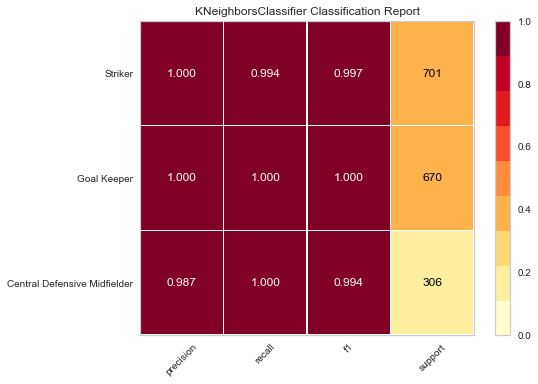

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [57]:

from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
classifier1= neighbors.KNeighborsClassifier(n_neighbors=5,p=2)
classes=['Central Defensive Midfielder','Goal Keeper','Striker']
visualizer = ClassificationReport(classifier1, classes=classes, support=True)

visualizer.fit(x_train1, y_train)  # Fit the visualizer and the model
visualizer.score(x_test1, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [58]:
y_test

Position
15332         1
3248          2
9297          1
13922         1
14508         2
...         ...
3876          0
12948         0
11941         2
16571         1
5148          1

[1677 rows x 1 columns]

In [59]:
x_test

Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
15332      16.0       11.0             15.0          27.0     16.0       15.0   
3248       67.0       70.0             71.0          68.0     61.0       75.0   
9297       10.0        7.0             22.0          19.0     12.0       25.0   
13922      13.0       18.0             16.0          24.0     17.0       18.0   
14508      54.0       62.0             63.0          57.0     61.0       54.0   
...         ...        ...              ...           ...      ...        ...   
3876       69.0       66.0             43.0          72.0     57.0       70.0   
12948      51.0       49.0             53.0          67.0     46.0       66.0   
11941      38.0       61.0             64.0          50.0     59.0       59.0   
16571      10.0        5.0             10.0          29.0      7.0        5.0   
5148       18.0       17.0             12.0          13.0     15.0       16.0   

       Curve  FKAccuracy  LongPassing  BallControl  Marking  StandingTackle  \
15332   15.0        15.0         22.0         21.0      8.0            18.0   
3248    62.0        66.0         68.0         75.0     37.0            39.0   
9297    24.0        14.0         28.0         20.0      9.0            10.0   
13922   18.0        16.0         21.0         26.0     21.0            20.0   
14508   42.0        37.0         53.0         57.0     31.0            24.0   
...      ...         ...          ...          ...      ...             ...   
3876    82.0        80.0         71.0         72.0     58.0            73.0   
12948   68.0        64.0         65.0         67.0     61.0            58.0   
11941   61.0        70.0         39.0         62.0     38.0            23.0   
16571   10.0         8.0         24.0         10.0      8.0             9.0   
5148    12.0        19.0         13.0         18.0     15.0            11.0   

       SlidingTackle  FitnessScore  GoalKeeperSkills  
15332           14.0         504.0             293.0  
3248            30.0        1084.0              61.0  
9297            10.0         588.0             330.0  
13922           19.0         456.0             304.0  
14508           23.0         903.0              57.0  
...              ...           ...               ...  
3876            72.0        1132.0              46.0  
12948           56.0        1053.0              57.0  
11941           22.0         955.0              51.0  
16571           11.0         471.0             286.0  
5148            12.0         710.0             346.0  

[1677 rows x 15 columns]

In [60]:
#Adding the predicted and actual scores to the dataframe.
x_test['Predicted_position'] = pd.Series(y_pred, index=x_test.index)
x_test['Actuaal Position'] = y_test

In [61]:
x_test.head()

Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
15332      16.0       11.0             15.0          27.0     16.0       15.0   
3248       67.0       70.0             71.0          68.0     61.0       75.0   
9297       10.0        7.0             22.0          19.0     12.0       25.0   
13922      13.0       18.0             16.0          24.0     17.0       18.0   
14508      54.0       62.0             63.0          57.0     61.0       54.0   

       Curve  FKAccuracy  LongPassing  BallControl  Marking  StandingTackle  \
15332   15.0        15.0         22.0         21.0      8.0            18.0   
3248    62.0        66.0         68.0         75.0     37.0            39.0   
9297    24.0        14.0         28.0         20.0      9.0            10.0   
13922   18.0        16.0         21.0         26.0     21.0            20.0   
14508   42.0        37.0         53.0         57.0     31.0            24.0   

       SlidingTackle  FitnessScore  GoalKeeperSkills  Predicted_position  \
15332           14.0         504.0             293.0                   1   
3248            30.0        1084.0              61.0                   2   
9297            10.0         588.0             330.0                   1   
13922           19.0         456.0             304.0                   1   
14508           23.0         903.0              57.0                   2   

       Actuaal Position  
15332                 1  
3248                  2  
9297                  1  
13922                 1  
14508                 2

Scatter 3D plot of players according to finishing, fitness score and goal keepers skills. Because, to differentiate the goak keeper
from other positions like ST and CDM we need the goalkeeping skill scores as only the goal keeper have more 
points that ST and CDM. similarly, goalkeepers have less fitness score as they dont do any physical skillset like penalty shoots, sprint etc.
To Differentiate the STriker position we have taken the finishing skill as strikers play forward towards opponents goal post
scoring goal. 

In [62]:

import plotly.express as px
fig = px.scatter_3d(x_test, x='GoalKeeperSkills', y='FitnessScore', z='Finishing',
              color='Predicted_position')
fig.show()

Scatter 3D plot of players according to Marking, Standing Tackle score and Sliding Tackle skills. Because, to differentiate the Central Defensive Midfielder
from other positions like ST and GK we need the Defensive skill scores as only the CDM have more 
points that ST and GK.

In [63]:

fig = px.scatter_3d(x_test, x='Marking', y='StandingTackle', z='SlidingTackle',
              color='Predicted_position')
fig.show()

In [64]:
# player differences in different position
def plot_radar(name_list, features, df):
    N = len(features) 
    # Assign series colors, title here
    series_color = ['r', 'b', 'g', 'y', 'o'] 
    text = 'Comparing Player Skills'
     
    plt.clf()
    fig=plt.figure(figsize=(10,10))

    ax = fig.add_subplot(111, polar=True)
    
    for idx, name in enumerate(name_list,0):
    #Set the angle of polar axis and close the plot
        angles=np.linspace(0, 2*np.pi, N, endpoint=False)
        angles=np.concatenate((angles,[angles[0]]))
        
        #Define the stats for each series and close the plot in radar chart.
        stats = df[labels].loc[df['Name']==name]
        stats = stats.values
        stats = np.concatenate((stats[0],[stats[0][0]]))
        #Plot series 1,2,3,4....:
        ax.plot(angles, stats, 'o-', 
                linewidth=2, color = series_color[idx], 
                label=name)  #label here is to populate the legend key 
        ax.fill(angles, stats, alpha=0.3, 
                color =  series_color[idx])
        idx+=1

### Plot formatting    
    plt.xticks(angles[:-1], labels,horizontalalignment='center', 
                verticalalignment='bottom')
    ax.set_rlabel_position(0)
    plt.yticks(  [20, 40, 60, 80],
       ['20', '40', '60', '80'], color= 'k', size=12, weight = 'bold')
    plt.ylim(0,100)

#     ax.set_thetagrids(angles * 180/np.pi, features)
#     ax.set_title(text, weight='bold', fontsize = 12,
#                   horizontalalignment='center', 
#                   verticalalignment='top')
    
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))    

    return

<Figure size 576x396 with 0 Axes>

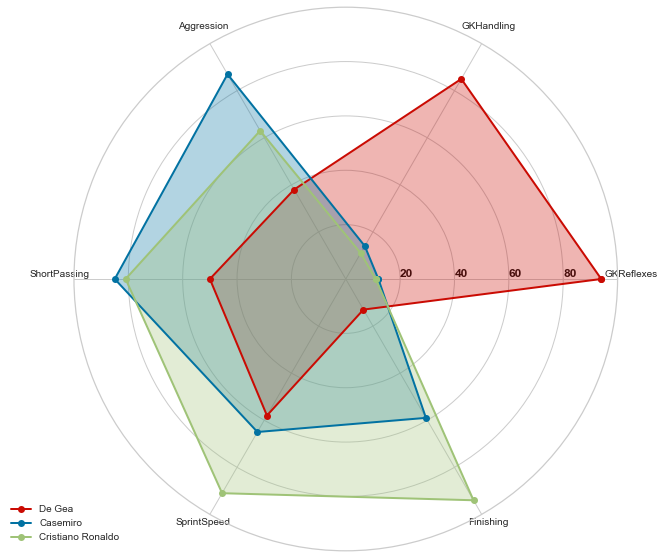

In [65]:
labels = ['GKReflexes','GKHandling', 'Aggression','ShortPassing', 'SprintSpeed','Finishing']
plot_radar(['De Gea','Casemiro', 'Cristiano Ronaldo'], labels, football)

<Figure size 576x396 with 0 Axes>

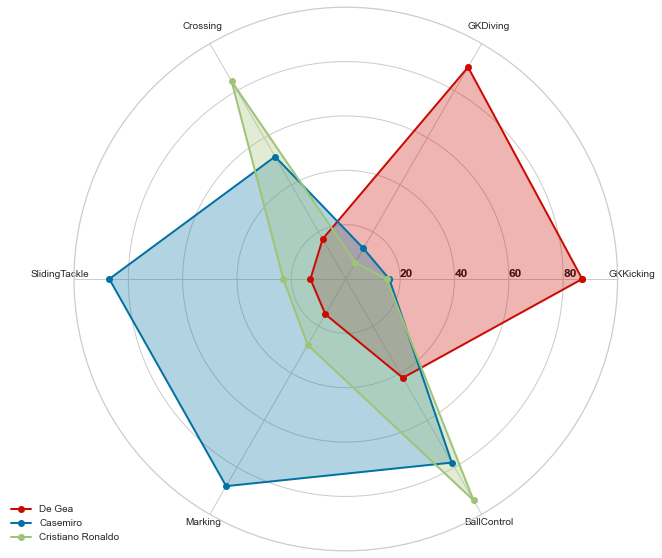

In [66]:
labels = ['GKKicking','GKDiving','Crossing', 'SlidingTackle','Marking','BallControl']
plot_radar(['De Gea','Casemiro', 'Cristiano Ronaldo'], labels, Footbal)

`From both these plots we can see that De Gea (GK) has good goal keeping skills GKDiving,GKkicking,GKReflexes and GKHandling but very few skills like Marking,crossing,sliding tackle,finishing which belongs to player with position forward(ST) and CDM.Even for both the players Casemiro(CDM) and Cristiano Ronaldo(ST) we can see them having good skills with respect to their position.`

Conclusion- To find out the differences between the players of the position ST,CDM and GK we decided to use the features or characteristics of a player playing in different position for that We used KNeighborsClassifier where we got 100% accuracy and f1 score which conveyed that the classifier has predicted the positions correct according to the features passed for defense, striker and goal keeper.So,for the further analysis we decided to plot a radar chart for three different players in different positions from which we can see that De Gea (GK) has good goal keeping skills GKDiving,GKkicking,GKReflexes and GKHandling but very few skills like Marking,crossing,sliding tackle,finishing which belongs to player with position forward(ST) and CDM.Even for both the players Casemiro(CDM) and Cristiano Ronaldo(ST) we can see them having good skills with respect to their position

# UseCase 3: What types of players with the position “ST” can be distinguished (e.g., “rather small and fast players”, “rather tall and strong players”, etc.)? What players are typical examples of these types? 

## Import Data
## Filter out unnecessary columns for analysis
## Converted Weight and height to float

In [67]:
with open('football.txt', 'w', encoding='utf-8', errors='ignore') as file:
    pd.read_excel('2021-06-23_Dataset_Fifa_19.xlsx').to_string(file, index=False)
players=pd.read_csv('football.txt')
players
players = players[['ID','Name','Age','Overall','Club','Value','Preferred Foot','Weak Foot','Position','Height','Weight','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing',
                     'BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots',
                     'Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']]
 
players = players[players.isnull().sum(axis=1) < 20]
players['Weight']

players['Weight']= players['Weight'].astype(str).str[:3] 
players['Weight'] = players['Weight'].astype(float)
players['Weight']

players =players.fillna(0.0)
def parse_ht(ht): 
    ht_ = ht.split("'")
    
     
    return float(ht_[0] +'.'+ ht_[1])

players['Height']= players['Height'].apply(lambda x:parse_ht(x))
players 

ID                Name  Age  Overall                 Club    Value  \
0      158023            L. Messi   31       94         FC Barcelona  €110.5M   
1       20801   Cristiano Ronaldo   33       94             Juventus     €77M   
2      190871           Neymar Jr   26       92  Paris Saint-Germain  €118.5M   
3      193080              De Gea   27       91    Manchester United     €72M   
4      192985        K. De Bruyne   27       91      Manchester City    €102M   
...       ...                 ...  ...      ...                  ...      ...   
18202  238813        J. Lundstram   19       47      Crewe Alexandra     €60K   
18203  243165  N. Christoffersson   19       47       Trelleborgs FF     €60K   
18204  241638           B. Worman   16       47     Cambridge United     €60K   
18205  246268      D. Walker-Rice   17       47      Tranmere Rovers     €60K   
18206  246269           G. Nugent   16       46      Tranmere Rovers     €60K   

      Preferred Foot  Weak Foot Position  Height  ...  Penalties  Composure  \
0               Left        4.0       RF    5.70  ...       75.0       96.0   
1              Right        4.0       ST    6.20  ...       85.0       95.0   
2              Right        5.0       LW    5.90  ...       81.0       94.0   
3              Right        3.0       GK    6.40  ...       40.0       68.0   
4              Right        5.0      RCM    5.11  ...       79.0       88.0   
...              ...        ...      ...     ...  ...        ...        ...   
18202          Right        2.0       CM    5.90  ...       43.0       45.0   
18203          Right        2.0       ST    6.30  ...       43.0       42.0   
18204          Right        3.0       ST    5.80  ...       55.0       41.0   
18205          Right        3.0       RW    5.10  ...       50.0       46.0   
18206          Right        3.0       CM    5.10  ...       33.0       43.0   

       Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  \
0         33.0            28.0           26.0       6.0        11.0   
1         28.0            31.0           23.0       7.0        11.0   
2         27.0            24.0           33.0       9.0         9.0   
3         15.0            21.0           13.0      90.0        85.0   
4         68.0            58.0           51.0      15.0        13.0   
...        ...             ...            ...       ...         ...   
18202     40.0            48.0           47.0      10.0        13.0   
18203     22.0            15.0           19.0      10.0         9.0   
18204     32.0            13.0           11.0       6.0         5.0   
18205     20.0            25.0           27.0      14.0         6.0   
18206     40.0            43.0           50.0      10.0        15.0   

       GKKicking  GKPositioning  GKReflexes  
0           15.0           14.0         8.0  
1           15.0           14.0        11.0  
2           15.0           15.0        11.0  
3           87.0           88.0        94.0  
4            5.0           10.0        13.0  
...          ...            ...         ...  
18202        7.0            8.0         9.0  
18203        9.0            5.0        12.0  
18204       10.0            6.0        13.0  
18205       14.0            8.0         9.0  
18206        9.0           12.0         9.0  

[18159 rows x 45 columns]

## Seperated  Striker and non striker

In [68]:

striker = players[players['Position'] =='ST']
nonstriker = players[players['Position'] !='ST']
nonstriker['Position']

0         RF
2         LW
3         GK
4        RCM
5         LF
        ... 
18199     CM
18201     RB
18202     CM
18205     RW
18206     CM
Name: Position, Length: 16007, dtype: object

## Plot for the key difference between Strikers and non Strikers

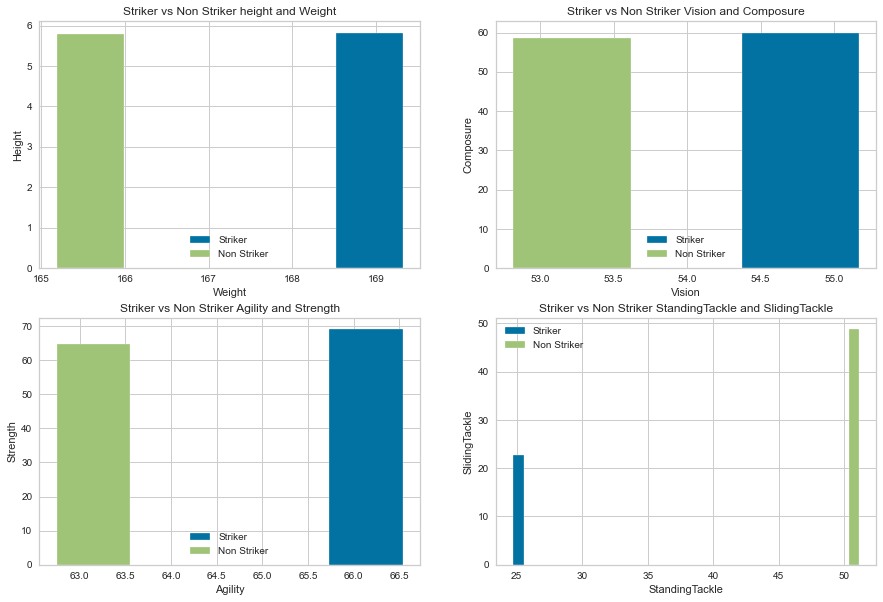

In [69]:
fig,a =  plt.subplots(2,2, figsize= (15,10))
a[0][0].bar(striker['Weight'].mean(),striker['Height'].mean())
a[0][0].bar(nonstriker['Weight'].mean(),nonstriker['Height'].mean())
a[0][0].set_xlabel('Weight')
a[0][0].set_ylabel('Height')
a[0][0].legend(labels=['Striker', 'Non Striker'])
a[0][0].set_title("Striker vs Non Striker height and Weight")

a[0][1].bar(striker['Vision'].mean(),striker['Composure'].mean())
a[0][1].bar(nonstriker['Vision'].mean(),nonstriker['Composure'].mean())
a[0][1].set_xlabel('Vision')
a[0][1].set_ylabel('Composure')
a[0][1].legend(labels=['Striker', 'Non Striker'])
a[0][1].set_title("Striker vs Non Striker Vision and Composure")

a[1][0].bar(striker['Agility'].mean(),striker['Strength'].mean())
a[1][0].bar(nonstriker['Agility'].mean(),nonstriker['Strength'].mean())
a[1][0].set_xlabel('Agility')
a[1][0].set_ylabel('Strength')
a[1][0].legend(labels=['Striker', 'Non Striker'])
a[1][0].set_title("Striker vs Non Striker Agility and Strength")

a[1][1].bar(striker['StandingTackle'].mean(),striker['SlidingTackle'].mean())
a[1][1].bar(nonstriker['StandingTackle'].mean(),nonstriker['SlidingTackle'].mean())
a[1][1].set_xlabel('StandingTackle')
a[1][1].set_ylabel('SlidingTackle')
a[1][1].legend(labels=['Striker', 'Non Striker'])
a[1][1].set_title("Striker vs Non Striker StandingTackle and SlidingTackle")
plt.show()
 

## Seperated more players according to position to compare against Strikers

In [70]:
gk= players[players['Position'] =='GK'] 
ls= players[players['Position'] =='LS']
cam= players[players['Position'] =='CAM']
rcm= players[players['Position'] =='RCM']
lwb= players[players['Position'] =='LWB']
lcb= players[players['Position'] =='LCB']
rb= players[players['Position'] =='RB']


## Plot that represents the average Stamina and Strength of Strikers and non Strikers.

### Blue represents strikers who in average have greater strength than average non strikers. Left Center Back in general tends to have greater strength than strikers.

### Similarly Strikers in general tend to have less stamina than RB, LWB,RCM but is in par with average of non strikers. 

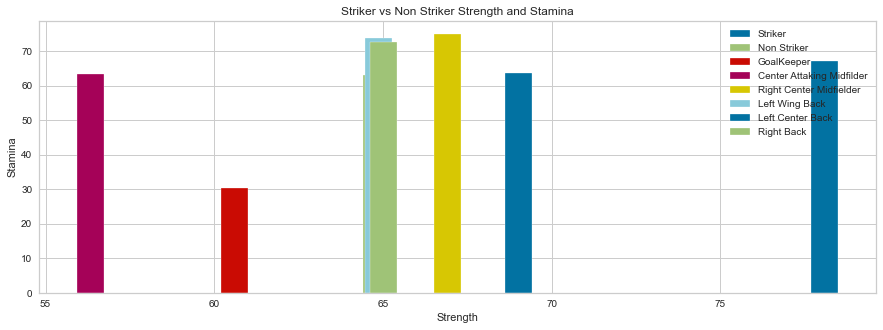

In [71]:
fig = plt.figure(figsize= (15,5))  

plt.bar(striker['Strength'].mean(),striker['Stamina'].mean())
plt.bar(nonstriker['Strength'].mean(),nonstriker['Stamina'].mean())

plt.bar(gk['Strength'].mean(),gk['Stamina'].mean()) 
plt.bar(cam['Strength'].mean(),cam['Stamina'].mean())
plt.bar(rcm['Strength'].mean(),rcm['Stamina'].mean())

plt.bar(lwb['Strength'].mean(),lwb['Stamina'].mean())
plt.bar(lcb['Strength'].mean(),lcb['Stamina'].mean())
plt.bar(rb['Strength'].mean(),rb['Stamina'].mean())

plt.xlabel('Strength')
plt.ylabel('Stamina')
plt.title("Striker vs Non Striker Strength and Stamina")
plt.legend(labels=['Striker', 'Non Striker', 'GoalKeeper', 'Center Attaking Midfilder', 'Right Center Midfielder', 'Left Wing Back', 
                  'Left Center Back', 'Right Back'])
plt.show()

## Plot that represents the average Sprint and Accleration of Strikers and non Strikers.

### Blue represents strikers who in average have greater strength than average non strikers(in orange). Left W Back, RB in general tends to have greater Sprint and Accleration than strikers. 

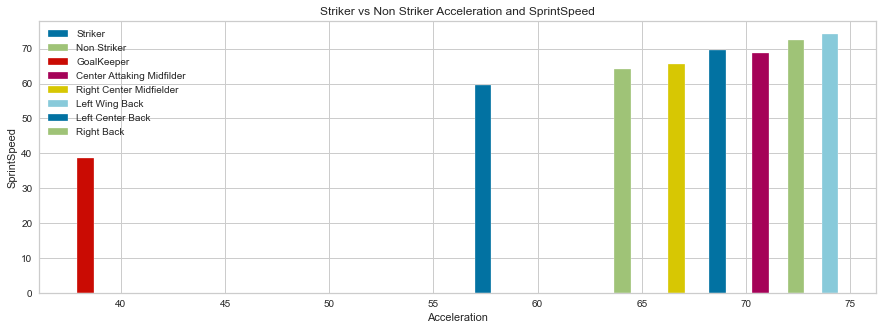

In [72]:
fig = plt.figure(figsize= (15,5))  

plt.bar(striker['Acceleration'].mean(),striker['SprintSpeed'].mean())
plt.bar(nonstriker['Acceleration'].mean(),nonstriker['SprintSpeed'].mean())

plt.bar(gk['Acceleration'].mean(),gk['SprintSpeed'].mean()) 
plt.bar(cam['Acceleration'].mean(),cam['SprintSpeed'].mean())
plt.bar(rcm['Acceleration'].mean(),rcm['SprintSpeed'].mean())

plt.bar(lwb['Acceleration'].mean(),lwb['SprintSpeed'].mean())
plt.bar(lcb['Acceleration'].mean(),lcb['SprintSpeed'].mean())
plt.bar(rb['Acceleration'].mean(),rb['SprintSpeed'].mean())

plt.xlabel('Acceleration')
plt.ylabel('SprintSpeed')
plt.title("Striker vs Non Striker Acceleration and SprintSpeed")
plt.legend(labels=['Striker', 'Non Striker', 'GoalKeeper', 'Center Attaking Midfilder', 'Right Center Midfielder', 'Left Wing Back', 
                  'Left Center Back', 'Right Back'])
plt.show()

## Plot that represents the average Finishing and Dribbling skills of Strikers and non Strikers.

### Blue represents strikers who in average have greater Finishing skills than average non strikers or any other positional players 

### But Strikers in general tend to have less Dribbling skills than Center Attaking Midfilder, Right Center Midfielder,Left Wing Back but better than  average of non strikers. 

### When comparing with the top players Ronaldo, Lewandowski, Agüero they far outperform in both skills than average.

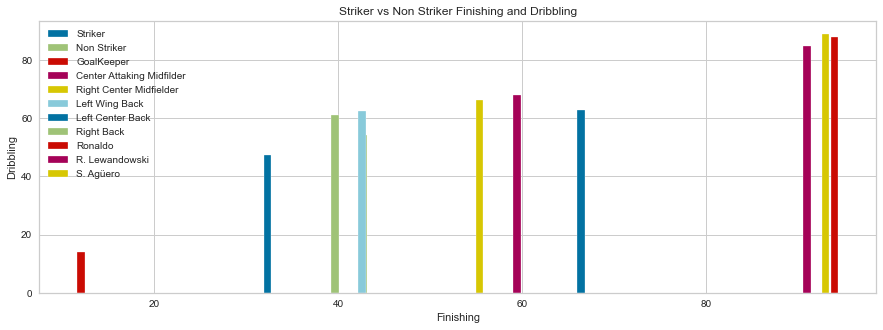

In [73]:
fig = plt.figure(figsize= (15,5))  

plt.bar(striker['Finishing'].mean(),striker['Dribbling'].mean())
plt.bar(nonstriker['Finishing'].mean(),nonstriker['Dribbling'].mean())

plt.bar(gk['Finishing'].mean(),gk['Dribbling'].mean()) 
plt.bar(cam['Finishing'].mean(),cam['Dribbling'].mean())
plt.bar(rcm['Finishing'].mean(),rcm['Dribbling'].mean())

plt.bar(lwb['Finishing'].mean(),lwb['Dribbling'].mean())
plt.bar(lcb['Finishing'].mean(),lcb['Dribbling'].mean())
plt.bar(rb['Finishing'].mean(),rb['Dribbling'].mean())

plt.bar(players['Finishing'][players['Name'] =='Cristiano Ronaldo'].mean(),players['Dribbling'][players['Name'] =='Cristiano Ronaldo'].mean())
plt.bar(players['Finishing'][players['Name'] =='R. Lewandowski'].mean(),players['Dribbling'][players['Name'] =='R. Lewandowski'].mean())
plt.bar(players['Finishing'][players['Name'] =='S. Agüero'].mean(),players['Dribbling'][players['Name'] =='S. Agüero'].mean())

plt.legend(labels=['Striker', 'Non Striker', 'GoalKeeper', 'Center Attaking Midfilder', 'Right Center Midfielder', 'Left Wing Back', 
                  'Left Center Back', 'Right Back', 'Ronaldo', 'R. Lewandowski'  ,'S. Agüero'])


plt.xlabel('Finishing')
plt.ylabel('Dribbling')
plt.title("Striker vs Non Striker Finishing and Dribbling")
plt.legend(labels=['Striker', 'Non Striker', 'GoalKeeper', 'Center Attaking Midfilder', 'Right Center Midfielder', 'Left Wing Back', 
                  'Left Center Back', 'Right Back', 'Ronaldo', 'R. Lewandowski'  ,'S. Agüero'])
plt.show()

 

## Plot that represents the average BallControl and Dribbling skills of Strikers and non Strikers.

### Blue represents strikers who in average have greater Ball Control skills than average non strikers 

### But Strikers in general   have approximately equal Free accuracy to than average non strikers. 
 

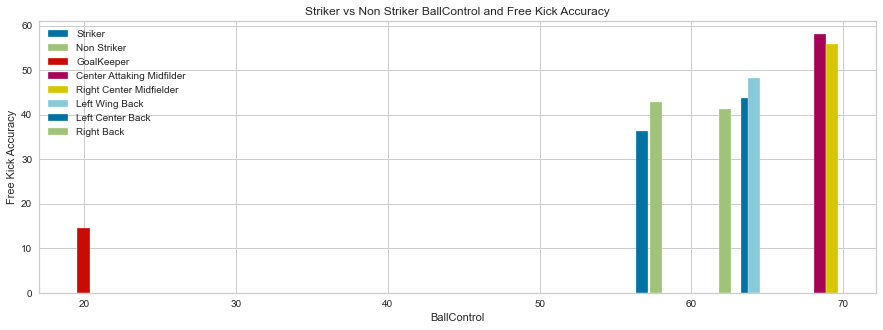

In [74]:
 fig = plt.figure(figsize= (15,5))  

plt.bar(striker['BallControl'].mean(),striker['FKAccuracy'].mean())
plt.bar(nonstriker['BallControl'].mean(),nonstriker['FKAccuracy'].mean())

plt.bar(gk['BallControl'].mean(),gk['FKAccuracy'].mean()) 
plt.bar(cam['BallControl'].mean(),cam['FKAccuracy'].mean())
plt.bar(rcm['BallControl'].mean(),rcm['FKAccuracy'].mean())

plt.bar(lwb['BallControl'].mean(),lwb['FKAccuracy'].mean())
plt.bar(lcb['BallControl'].mean(),lcb['FKAccuracy'].mean())
plt.bar(rb['BallControl'].mean(),rb['FKAccuracy'].mean())

plt.xlabel('BallControl')
plt.ylabel('Free Kick Accuracy')
plt.title("Striker vs Non Striker BallControl and Free Kick Accuracy")
plt.legend(labels=['Striker', 'Non Striker', 'GoalKeeper', 'Center Attaking Midfilder', 'Right Center Midfielder', 'Left Wing Back', 
                  'Left Center Back', 'Right Back'])
plt.show()

## Plot that represents the average Long Passing and Short Passing skills of Strikers and non Strikers.

### Strikers who in average have less Long Passing skills than average non strikers 

### But Strikers in general have approximately equal ShortPassing skills to than average non strikers. 

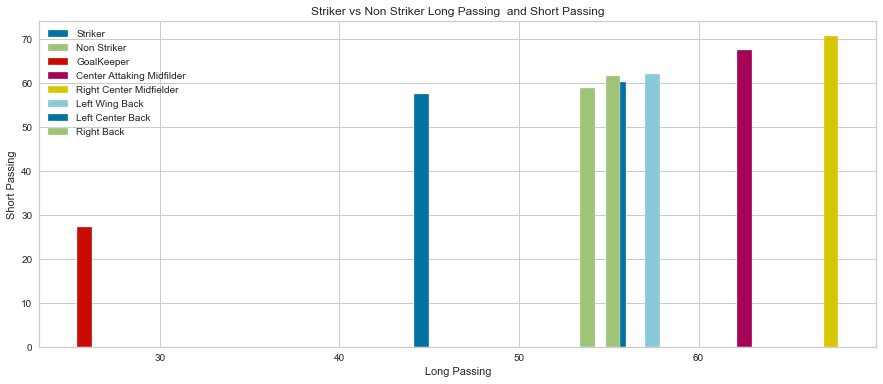

In [75]:
fig = plt.figure(figsize= (15,6))  

plt.bar(striker['LongPassing'].mean(),striker['ShortPassing'].mean())
plt.bar(nonstriker['LongPassing'].mean(),nonstriker['ShortPassing'].mean())

plt.bar(gk['LongPassing'].mean(),gk['ShortPassing'].mean()) 
plt.bar(cam['LongPassing'].mean(),cam['ShortPassing'].mean())
plt.bar(rcm['LongPassing'].mean(),rcm['ShortPassing'].mean())

plt.bar(lwb['LongPassing'].mean(),lwb['ShortPassing'].mean())
plt.bar(lcb['LongPassing'].mean(),lcb['ShortPassing'].mean())
plt.bar(rb['LongPassing'].mean(),rb['ShortPassing'].mean())

plt.title("Striker vs Non Striker Long Passing  and Short Passing")
plt.legend(labels=['Striker', 'Non Striker', 'GoalKeeper', 'Center Attaking Midfilder', 'Right Center Midfielder', 'Left Wing Back', 
                  'Left Center Back', 'Right Back'])
plt.xlabel('Long Passing')
plt.ylabel('Short Passing')
plt.show()

## Plot that represents the average Long Passing and Short Passing skills of Strikers,  non Strikers and few strikers in particular.

### Top rated players Ronaldo and Lewandowski outperform average of all positional players in Short passing while Worman not.

### Top rated  Strikers in general have  Long passing skills better than average of most positional average. 

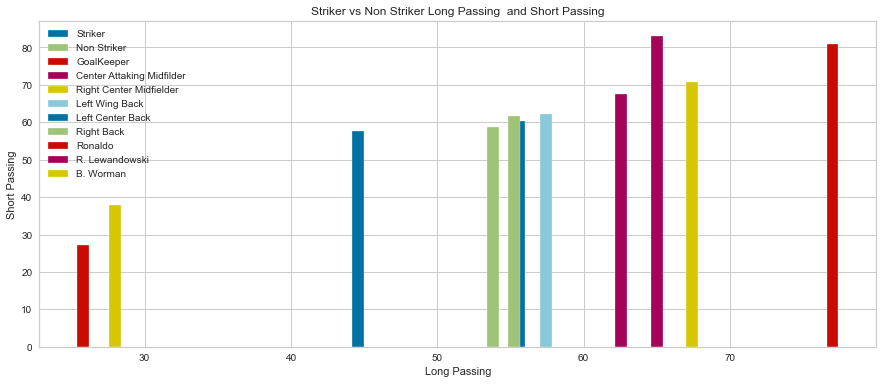

In [76]:
 

fig = plt.figure(figsize= (15,6))  

plt.bar(striker['LongPassing'].mean(),striker['ShortPassing'].mean())
plt.bar(nonstriker['LongPassing'].mean(),nonstriker['ShortPassing'].mean())

plt.bar(gk['LongPassing'].mean(),gk['ShortPassing'].mean()) 
plt.bar(cam['LongPassing'].mean(),cam['ShortPassing'].mean())
plt.bar(rcm['LongPassing'].mean(),rcm['ShortPassing'].mean())

plt.bar(lwb['LongPassing'].mean(),lwb['ShortPassing'].mean())
plt.bar(lcb['LongPassing'].mean(),lcb['ShortPassing'].mean())
plt.bar(rb['LongPassing'].mean(),rb['ShortPassing'].mean())

plt.bar(players['LongPassing'][players['Name'] =='Cristiano Ronaldo'].mean(),players['ShortPassing'][players['Name'] =='Cristiano Ronaldo'].mean())
plt.bar(players['LongPassing'][players['Name'] =='R. Lewandowski'].mean(),players['ShortPassing'][players['Name'] =='R. Lewandowski'].mean())
plt.bar(players['LongPassing'][players['Name'] =='B. Worman'].mean(),players['ShortPassing'][players['Name'] =='B. Worman'].mean())


plt.title("Striker vs Non Striker Long Passing  and Short Passing")
plt.legend(labels=['Striker', 'Non Striker', 'GoalKeeper', 'Center Attaking Midfilder', 'Right Center Midfielder', 'Left Wing Back', 
                  'Left Center Back', 'Right Back', 'Ronaldo', 'R. Lewandowski'  ,'B. Worman'])
plt.xlabel('Long Passing')
plt.ylabel('Short Passing')
plt.show()


In [77]:
striker

ID                Name  Age  Overall                Club   Value  \
1       20801   Cristiano Ronaldo   33       94            Juventus    €77M   
10     188545      R. Lewandowski   29       90   FC Bayern München    €77M   
16     202126             H. Kane   24       89   Tottenham Hotspur  €83.5M   
23     153079           S. Agüero   30       89     Manchester City  €64.5M   
36     173731             G. Bale   28       88         Real Madrid    €60M   
...       ...                 ...  ...      ...                 ...     ...   
18177  238550           R. Roache   18       48           Blackpool    €70K   
18189  240160          A. Kaltner   18       47  SpVgg Unterhaching    €60K   
18200  231381            J. Young   18       47        Swindon Town    €60K   
18203  243165  N. Christoffersson   19       47      Trelleborgs FF    €60K   
18204  241638           B. Worman   16       47    Cambridge United    €60K   

      Preferred Foot  Weak Foot Position  Height  ...  Penalties  Composure  \
1              Right        4.0       ST     6.2  ...       85.0       95.0   
10             Right        4.0       ST     6.0  ...       88.0       86.0   
16             Right        4.0       ST     6.2  ...       90.0       89.0   
23             Right        4.0       ST     5.8  ...       83.0       90.0   
36              Left        3.0       ST     6.1  ...       76.0       86.0   
...              ...        ...      ...     ...  ...        ...        ...   
18177          Right        3.0       ST     5.1  ...       55.0       49.0   
18189          Right        3.0       ST     5.1  ...       48.0       37.0   
18200           Left        2.0       ST     5.9  ...       58.0       50.0   
18203          Right        2.0       ST     6.3  ...       43.0       42.0   
18204          Right        3.0       ST     5.8  ...       55.0       41.0   

       Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  \
1         28.0            31.0           23.0       7.0        11.0   
10        34.0            42.0           19.0      15.0         6.0   
16        56.0            36.0           38.0       8.0        10.0   
23        30.0            20.0           12.0      13.0        15.0   
36        54.0            55.0           52.0      15.0        15.0   
...        ...             ...            ...       ...         ...   
18177     18.0            16.0           11.0       6.0         9.0   
18189     28.0            15.0           22.0      15.0         5.0   
18200     15.0            17.0           14.0      11.0        15.0   
18203     22.0            15.0           19.0      10.0         9.0   
18204     32.0            13.0           11.0       6.0         5.0   

       GKKicking  GKPositioning  GKReflexes  
1           15.0           14.0        11.0  
10          12.0            8.0        10.0  
16          11.0           14.0        11.0  
23           6.0           11.0        14.0  
36          11.0            5.0         6.0  
...          ...            ...         ...  
18177       11.0            7.0        12.0  
18189       14.0           12.0         8.0  
18200       12.0           12.0        11.0  
18203        9.0            5.0        12.0  
18204       10.0            6.0        13.0  

[2152 rows x 45 columns]

In [78]:
vector1 = np.array(striker['LongPassing'].mean())
vector2 = np.array(players['LongPassing'][players['Name'] =='R. Roache'])

vector3 = np.array(striker['LongPassing'].mean())
vector4 = np.array(players['LongPassing'][players['Name'] =='R. Lewandowski'])

vector5 = np.array(striker['LongPassing'].mean())
vector6 = np.array(players['LongPassing'][players['Name'] =='B. Worman'])
 
op1=np.sqrt(np.sum(np.square(vector1-vector2))) 
op2=np.sqrt(np.sum(np.square(vector3-vector4)))
op3=np.sqrt(np.sum(np.square(vector5-vector6)))


print(op1)
print(op2)
print(op3) 
vector4

12.576672862453535
20.423327137546465
16.576672862453535


array([65.])

In [79]:
pla=players 
pla 

ID                Name  Age  Overall                 Club    Value  \
0      158023            L. Messi   31       94         FC Barcelona  €110.5M   
1       20801   Cristiano Ronaldo   33       94             Juventus     €77M   
2      190871           Neymar Jr   26       92  Paris Saint-Germain  €118.5M   
3      193080              De Gea   27       91    Manchester United     €72M   
4      192985        K. De Bruyne   27       91      Manchester City    €102M   
...       ...                 ...  ...      ...                  ...      ...   
18202  238813        J. Lundstram   19       47      Crewe Alexandra     €60K   
18203  243165  N. Christoffersson   19       47       Trelleborgs FF     €60K   
18204  241638           B. Worman   16       47     Cambridge United     €60K   
18205  246268      D. Walker-Rice   17       47      Tranmere Rovers     €60K   
18206  246269           G. Nugent   16       46      Tranmere Rovers     €60K   

      Preferred Foot  Weak Foot Position  Height  ...  Penalties  Composure  \
0               Left        4.0       RF    5.70  ...       75.0       96.0   
1              Right        4.0       ST    6.20  ...       85.0       95.0   
2              Right        5.0       LW    5.90  ...       81.0       94.0   
3              Right        3.0       GK    6.40  ...       40.0       68.0   
4              Right        5.0      RCM    5.11  ...       79.0       88.0   
...              ...        ...      ...     ...  ...        ...        ...   
18202          Right        2.0       CM    5.90  ...       43.0       45.0   
18203          Right        2.0       ST    6.30  ...       43.0       42.0   
18204          Right        3.0       ST    5.80  ...       55.0       41.0   
18205          Right        3.0       RW    5.10  ...       50.0       46.0   
18206          Right        3.0       CM    5.10  ...       33.0       43.0   

       Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  \
0         33.0            28.0           26.0       6.0        11.0   
1         28.0            31.0           23.0       7.0        11.0   
2         27.0            24.0           33.0       9.0         9.0   
3         15.0            21.0           13.0      90.0        85.0   
4         68.0            58.0           51.0      15.0        13.0   
...        ...             ...            ...       ...         ...   
18202     40.0            48.0           47.0      10.0        13.0   
18203     22.0            15.0           19.0      10.0         9.0   
18204     32.0            13.0           11.0       6.0         5.0   
18205     20.0            25.0           27.0      14.0         6.0   
18206     40.0            43.0           50.0      10.0        15.0   

       GKKicking  GKPositioning  GKReflexes  
0           15.0           14.0         8.0  
1           15.0           14.0        11.0  
2           15.0           15.0        11.0  
3           87.0           88.0        94.0  
4            5.0           10.0        13.0  
...          ...            ...         ...  
18202        7.0            8.0         9.0  
18203        9.0            5.0        12.0  
18204       10.0            6.0        13.0  
18205       14.0            8.0         9.0  
18206        9.0           12.0         9.0  

[18159 rows x 45 columns]

## Creating Seperate dataframe to store Euclidean  distance of each players qualities in different area to the mean of Strikers.

### For example, The average dribbling score of all Strikers compared with Ronaldo. 
### Euclidean distance score gives the distance of the difference.  

In [80]:
df = pd.DataFrame(columns=['Name','LongPassing' ]) 
for i in pla['Name']:
        
        vector1 = np.array(striker['LongPassing'].mean())
        vector2 = np.array(pla['LongPassing'][pla['Name'] == i])
        man=np.sqrt(np.sum(np.square(vector1-vector2)))
        df = df.append({'Name': i,'LongPassing': man}, ignore_index=True)
 

df1 = pd.DataFrame(columns=['Name','BallControl' ]) 
for i in pla['Name']:
        
        vector1 = np.array(striker['BallControl'].mean())
        vector2 = np.array(pla['BallControl'][pla['Name'] == i])
        man=np.sqrt(np.sum(np.square(vector1-vector2)))
        df1 = df1.append({'Name': i,'BallControl': man}, ignore_index=True)

        
df2 = pd.DataFrame(columns=['Name','Finishing' ]) 
for i in pla['Name']:
        
        vector1 = np.array(striker['Finishing'].mean())
        vector2 = np.array(pla['Finishing'][pla['Name'] == i])
        man=np.sqrt(np.sum(np.square(vector1-vector2)))
        df2 = df2.append({'Name': i,'Finishing': man}, ignore_index=True)
        
df3 = pd.DataFrame(columns=['Name','Dribbling' ]) 
for i in pla['Name']:
        
        vector1 = np.array(striker['Dribbling'].mean())
        vector2 = np.array(pla['Dribbling'][pla['Name'] == i])
        man=np.sqrt(np.sum(np.square(vector1-vector2)))
        df3 = df3.append({'Name': i,'Dribbling': man}, ignore_index=True)
        
df4 = pd.DataFrame(columns=['Name','Weight' ]) 
for i in pla['Name']:
        
        vector1 = np.array(striker['Weight'].mean())
        vector2 = np.array(pla['Weight'][pla['Name'] == i])
        man=np.sqrt(np.sum(np.square(vector1-vector2)))
        df4 = df4.append({'Name': i,'Weight': man}, ignore_index=True)

df5 = pd.DataFrame(columns=['Name','Position' ]) 
for i in pla['Name']: 
        
        vector2 = np.array(pla['Position'][pla['Name'] == i])
        df5 = df5.append({'Name': i,'Position': vector2}, ignore_index=True)
        

df5['Position']= df5['Position'].astype(str).str[2:-2]     

dfs = [df5,df, df1, df2, df3,df4]
dfs = [df.set_index('Name') for df in dfs]
#dfs[0].join(dfs[1:])
dfs=pd.DataFrame().join(dfs, how="outer")
  
print(dfs.reindex())

               Position  LongPassing  BallControl  Finishing  Dribbling  \
Name                                                                      
A. Abang             ST    16.576673     4.638941   5.421004   6.695632   
A. Abdellaoui        LB     0.423327    16.638941  41.421004  23.695632   
A. Abdennour         CB    17.423327    12.638941  18.421004  14.695632   
A. Abdi              CM    27.423327    10.361059   5.421004   7.304368   
A. Abdu Jaber        ST     4.576673     4.638941   0.421004   1.695632   
...                 ...          ...          ...        ...        ...   
Óscar Gil            RB    10.576673    13.638941  36.421004   5.695632   
Óscar Pinchi         LM    18.423327     6.361059   0.421004   6.304368   
Óscar Plano          LM    20.423327     9.361059   7.578996   9.304368   
Óscar Valentín      CDM    18.423327     4.361059  38.421004   4.695632   
Óscar Whalley        GK    14.576673    45.638941  49.421004  46.695632   

                   Weigh

 ## Selecting only the strikers and take the average of all Euclidean distance of these 5 features(LongPassing,BallControl,Finishing,Dribbling,Weight) .
 ## More features can be added for more accuracy.

In [81]:
StrikersSimilarity= dfs[dfs['Position'] == 'ST']  
StrikersSimilarity['Avg']= (StrikersSimilarity['LongPassing'] + StrikersSimilarity['BallControl'] + StrikersSimilarity['Finishing'] + StrikersSimilarity['Dribbling'] + StrikersSimilarity['Weight'])/5
StrikersSimilarity

Position  LongPassing  BallControl  Finishing  Dribbling  \
Name                                                                     
A. Abang            ST    16.576673     4.638941   5.421004   6.695632   
A. Abdu Jaber       ST     4.576673     4.638941   0.421004   1.695632   
A. Adam             ST    10.576673     3.638941   0.578996   0.695632   
A. Addai            ST    12.576673    13.638941   9.421004  13.695632   
A. Agouda           ST    11.576673    11.638941   9.421004  17.695632   
...                ...          ...          ...        ...        ...   
Zhu Jianrong        ST     8.423327    15.638941   0.421004   7.695632   
Zé Luís             ST     0.576673    17.361059   7.578996  17.304368   
Zé Turbo            ST     7.576673     0.361059   1.421004   0.304368   
Álex López          ST     4.423327     6.361059   5.421004   1.304368   
Éder                ST    18.423327     5.361059   7.578996   4.304368   

                  Weight        Avg  
Name                                 
A. Abang        7.916822   8.249814  
A. Abdu Jaber  14.916822   5.249814  
A. Adam         9.916822   5.081413  
A. Addai        5.916822  11.049814  
A. Agouda      14.916822  13.049814  
...                  ...        ...  
Zhu Jianrong   12.083178   8.852416  
Zé Luís        25.083178  13.580855  
Zé Turbo       12.083178   4.349257  
Álex López      3.916822   4.285316  
Éder           10.083178   9.150186  

[1892 rows x 7 columns]

## The players having the lowest average value can be considered as having features of a tipycal Striker. 
### Here Miguel, Rosseti, vergos can be distinguished as typical Strikers

In [82]:
StrikersSimiy=StrikersSimilarity.sort_values(by=['Avg'], inplace=True)
StrikersSimilarity

Position  LongPassing  BallControl  Finishing  Dribbling  \
Name                                                                         
Miguel                  ST     1.576673     0.361059   1.421004   0.304368   
L. Rosseti              ST     0.423327     0.638941   0.421004   0.304368   
N. Vergos               ST     0.576673     0.361059   0.421004   4.695632   
P. Caballero            ST     0.423327     0.361059   0.578996   0.695632   
Juan Delgado            ST     0.576673     0.638941   1.578996   1.695632   
...                    ...          ...          ...        ...        ...   
S. Agüero               ST    19.423327    25.361059  26.578996  26.304368   
G. Bale                 ST    35.423327    21.361059  19.578996  24.304368   
R. Lukaku               ST    28.423327     8.361059  20.578996  17.304368   
T. Chorý                ST    23.576673    19.638941   9.421004  14.695632   
Cristiano Ronaldo       ST    32.423327    30.361059  27.578996  25.304368   

                      Weight        Avg  
Name                                     
Miguel              1.083178   0.949257  
L. Rosseti          3.083178   0.974164  
N. Vergos           1.083178   1.427509  
P. Caballero        5.083178   1.428439  
Juan Delgado        3.083178   1.514684  
...                      ...        ...  
S. Agüero          14.916822  22.516914  
G. Bale            12.083178  22.550186  
R. Lukaku          38.083178  22.550186  
T. Chorý           54.083178  24.283086  
Cristiano Ronaldo  14.083178  25.950186  

[1892 rows x 7 columns]